In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
all_data = datasets.load_iris()
data = pd.DataFrame(all_data['data'], columns=all_data.feature_names)
target = pd.Series(all_data.target, name='flower').map(dict(zip(set(all_data.target),list(all_data.target_names))))
data = pd.concat([data, target],axis=1)

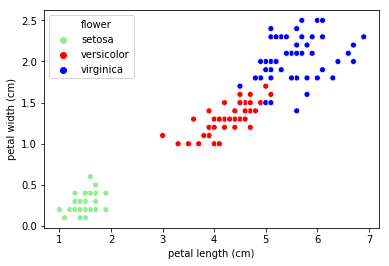

In [58]:
# Create an array with the colors you want to use
colors = ["lightgreen", "red", 'blue']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#plt.figure(figsize=(8,6))
sns.scatterplot(x=data['petal length (cm)'], y=data['petal width (cm)'], alpha=1, hue=data['flower'])
plt.show()

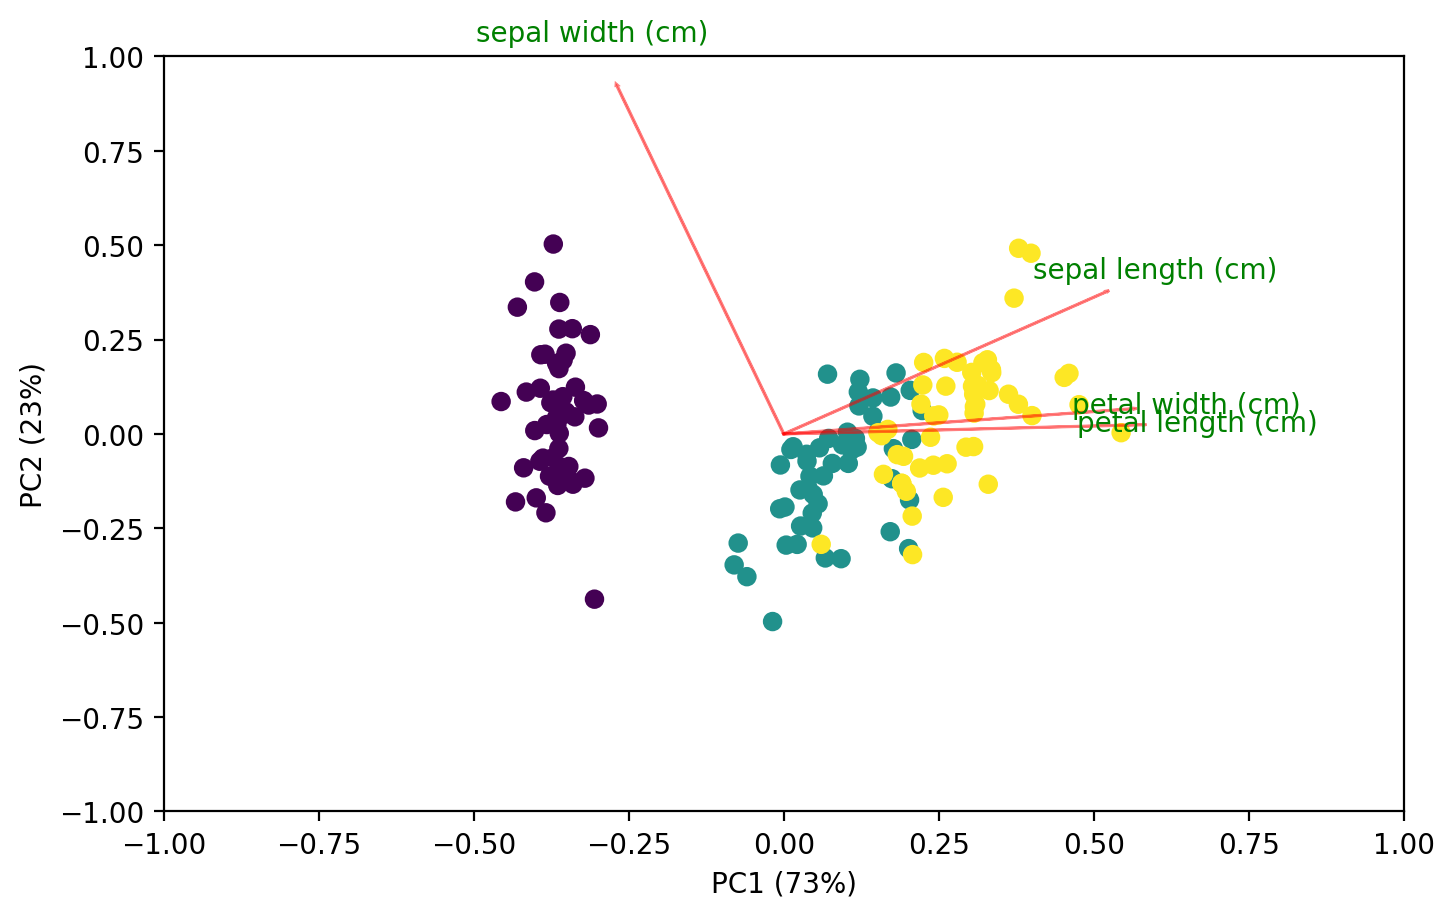

In [68]:
iris = datasets.load_iris()
X = iris.data
target = iris.target

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
X = scaler.fit_transform(X)    
pca = PCA()
pca_data = pca.fit_transform(X)

def pca_2d_plot_with_loadings(pca_data, target, coeffs, explained_var, labels=None):
    
    # Scale PCA data to -1 and 1 to plot eigenvectors easier
    pca_data = pca_data / (pca_data.max(axis=0) - pca_data.min(axis=0))
    
    # Plot x, y PCA data
    plt.figure(figsize=(8, 5), dpi=200)
    plt.scatter(pca_data[:,0], pca_data[:,1], c=target)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel(f"PC1 ({explained_var[0]:.0%})")
    plt.ylabel(f"PC2 ({explained_var[1]:.0%})")
    
    # Plot eigenvectors
    for idx, vector in enumerate(coeffs):
        plt.arrow(0, 0, vector[0], vector[1], color='r', alpha = 0.5)
        if labels is None:
            labels = [f"Var {i+1}" for i in range(len(coeffs))]
        plt.text(vector[0] * 1.15, vector[1] * 1.15, labels[idx], color='g', ha='center', va='center')

#Call the function. Use only the 2 PCs.
pca_2d_plot_with_loadings(pca_data[:,:2], target, pca.components_[:2, :].T, pca.explained_variance_ratio_[:2],
                          labels=all_data.feature_names)
plt.show()